# Metadata clustering

In [25]:
import json
import numpy as np

load metadata form JSON

In [26]:
meta = None
with open('./scraped/metadata.json') as f:
    meta = json.load(f)

In [27]:
meta[0]

{'name': 'Bitcoin',
 'symbol': 'BTC',
 'market_cap': 853156332063.032,
 'fully_diluted_market_cap': 853156332063.032,
 'circulating_supply': 18995500,
 'total_supply': 18995500,
 'max_supply': 21000000}

In [28]:
index2name = []
for m in meta:
    index2name.append(m.get('name'))

In [29]:
index2name[:5]

['Bitcoin', 'Ethereum', 'BNB', 'XRP', 'Cardano']

Feature vectors

In [30]:
embed = []
for m in meta:
    feats = np.array([m.get('market_cap'), m.get('fully_diluted_market_cap'), m.get('circulating_supply'), m.get('total_supply')])
    embed.append(feats)
embed = np.array(embed)

In [31]:
embed

array([[8.53156332e+11, 8.53156332e+11, 1.89955000e+07, 1.89955000e+07],
       [3.82421302e+11, 3.82421302e+11, 1.20135312e+08, 1.20135312e+08],
       [6.90548205e+10, 6.90548205e+10, 1.65116761e+08, 1.65116761e+08],
       ...,
       [6.32231262e+07, 6.32231262e+07, 5.95248695e+08, 6.55932996e+08],
       [6.30349240e+07, 6.30349240e+07, 3.38541660e+07, 2.50000000e+08],
       [6.25803319e+07, 6.25803319e+07, 4.40859613e+16, 4.67758553e+16]])

TSNE plot

In [44]:
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [45]:
tsne = TSNE(n_components=2, learning_rate='auto').fit_transform(embed)

c:\users\wangy80\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


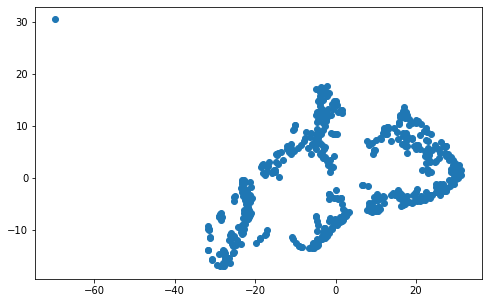

In [46]:
df_subset = {}
df_subset['x'] = tsne[:,0]
df_subset['y'] = tsne[:,1]
plt.figure(figsize=(8,5))
plt.scatter(df_subset['x'], df_subset['y'])

In [47]:
tsne.shape

(500, 2)

In [53]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(tsne)
kmeans.labels_

array([3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 2, 4, 1, 3,
       2, 1, 3, 3, 3, 4, 3, 3, 4, 3, 2, 3, 3, 2, 4, 4, 1, 3, 3, 1, 3, 4,
       3, 4, 3, 2, 3, 4, 3, 3, 2, 3, 1, 3, 4, 1, 3, 1, 4, 4, 1, 4, 3, 3,
       3, 0, 2, 2, 4, 2, 4, 2, 1, 1, 0, 4, 0, 2, 0, 4, 4, 4, 2, 4, 0, 5,
       2, 1, 1, 5, 0, 4, 5, 5, 5, 4, 5, 4, 1, 4, 5, 4, 4, 5, 2, 2, 4, 5,
       5, 0, 4, 1, 4, 1, 0, 0, 4, 2, 4, 4, 0, 1, 4, 4, 5, 5, 1, 2, 4, 5,
       2, 2, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 2, 4, 3, 2, 3, 4, 4, 5,
       5, 4, 0, 1, 5, 4, 5, 0, 2, 2, 5, 5, 4, 5, 4, 4, 1, 5, 2, 5, 1, 2,
       0, 4, 0, 4, 5, 4, 4, 5, 0, 5, 0, 1, 4, 4, 2, 5, 5, 4, 5, 4, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 5, 5, 4, 0, 1, 4, 5, 5, 4, 2, 5, 5, 2, 1, 4,
       2, 1, 4, 0, 2, 4, 2, 0, 4, 5, 0, 4, 1, 5, 0,

In [54]:
tsne_label = np.hstack((tsne, kmeans.labels_[:, np.newaxis]))

In [55]:
tsne_label.shape

(500, 3)

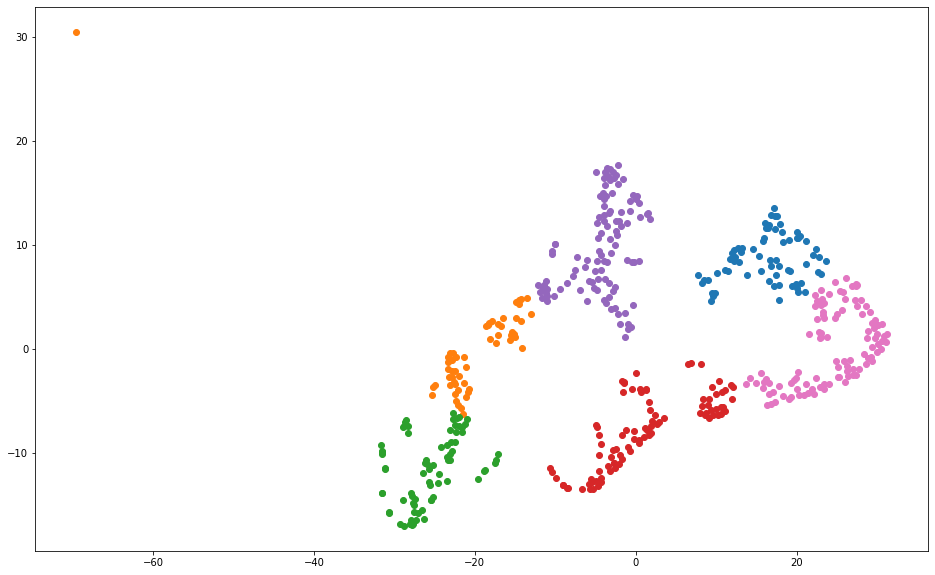

In [59]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink']

plt.figure(figsize=(16,10))
for i in range(6):
    data = tsne_label[tsne_label[:, 2] == i]
    plt.scatter(data[:, 0], data[:, 1], color=COLORS[i])

In [62]:
np.where(np.logical_and(tsne[:, 0] < -60, tsne[:, 1] > 28))[0]

array([499], dtype=int32)

In [63]:
tsne[499]

array([-69.58624 ,  30.518631], dtype=float32)

In [64]:
index2name[499]

'RichQUACK.com'

write to json

In [75]:
meta_cat = []
for m, y in zip(meta, kmeans.labels_):
    meta_cat.append({
        'name': m.get('name'),
        'symbol': m.get('symbol'),
        'meta': int(y)
    })

In [76]:
meta_cat[:10]

[{'name': 'Bitcoin', 'symbol': 'BTC', 'meta': 3},
 {'name': 'Ethereum', 'symbol': 'ETH', 'meta': 3},
 {'name': 'BNB', 'symbol': 'BNB', 'meta': 3},
 {'name': 'XRP', 'symbol': 'XRP', 'meta': 2},
 {'name': 'Cardano', 'symbol': 'ADA', 'meta': 2},
 {'name': 'Solana', 'symbol': 'SOL', 'meta': 3},
 {'name': 'Terra', 'symbol': 'LUNA', 'meta': 3},
 {'name': 'Avalanche', 'symbol': 'AVAX', 'meta': 3},
 {'name': 'Polkadot', 'symbol': 'DOT', 'meta': 3},
 {'name': 'Dogecoin', 'symbol': 'DOGE', 'meta': 2}]

In [79]:
with open('./scraped/categories.json', 'w') as f:
    json.dump(meta_cat, f, indent=4)